In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Commented out IPython magic to ensure Python compatibility.
#import libraries
import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import keras
import cv2
# %matplotlib inline

#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
np.random.seed(42)


In [ ]:
zip_files = glob.glob('/content/drive/MyDrive/kraggle/*.zip')

print('{} files found in the input directory'.format(str(len(zip_files))) +'\n')
for file in zip_files:
    with zipfile.ZipFile(file, 'r') as Z:
        Z.extractall('data')
    print ('{} is extracted'.format(file.split('/')[-1]) + '\n')

print('Extraction is completed' + '\n')

2 files found in the input directory

test1.zip is extracted

train.zip is extracted

Extraction is completed



In [ ]:
data = []
label = []
path = "./data/train/"
c = 0
d = 0
IMG_SIZE = 32

for file in os.listdir(path):
    img=cv2.imread(path+file)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    img=img.astype('float32')

    if file[:3]=='cat':
        if c==10000: continue
        c+=1
        label.append("cat")
    else:
        if d==10000: continue
        d+=1
        label.append("dog")

    data.append(img)
data = np.array(data)

In [ ]:
file_test = os.listdir('./data/train/')
len(file_test)
file_test = os.listdir('./data/test1/')
len(file_test)

12500

In [ ]:
len(data)

20000

In [ ]:
# converting label cat to 0 and dog to 1
data_label = []
for i in label:
    if i=="cat": data_label.append(0)
    else: data_label.append(1)
data_label = np.array(data_label)

In [ ]:
# Data Normalization

# Normalization
data = data/255.0

# k-means accept data with less than 3 dimensions
reshaped_data = data.reshape(len(data),-1)
reshaped_data.shape    # (data length,  length of the array along the second dimension)

(20000, 3072)

In [ ]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(reshaped_data)
kmeans.cluster_centers_.shape


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(2, 3072)

In [ ]:
test_data = []
test_label = []
# path = "./data/test1/"
path = "./data/train/"
IMG_SIZE = 32
c = 10000
d = 10000

for file in os.listdir(path):
    img = cv2.imread(path + file)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32')

    if file[:3] == 'cat':
        if c >= 12500:  # Skip images outside the desired range
            continue
        c += 1
        test_label.append(0)
    else:
        if d >= 12500:  # Skip images outside the desired range
            continue
        d += 1
        test_label.append(1)

    test_data.append(img)

test_data = np.array(test_data)
len(test_data)

5000

In [ ]:
test_data = test_data/255.0

# Reshape and normalize the test data for prediction
reshaped_test_data = test_data.reshape(len(test_data), -1)
reshaped_test_data = reshaped_test_data / 255.0  # Normalize the reshaped test data

print(len(reshaped_test_data))

test_result = kmeans.predict(reshaped_test_data)


for i in test_result:
  print(i)


match_count = 0
total_count = len(test_label)



test_data = test_data/255.0
# for i in test_data:
#   print(i)

# k-means accept data with less than 3 dimensions
reshaped_test_data = test_data.reshape(len(test_data),-1)

# for i in reshaped_test_data:
#   print(i)
print(len(reshaped_test_data))

test_result = kmeans.predict(reshaped_test_data)

match_count = 0
total_count = len(test_label)




Streaming output truncated to the last 5000 lines.
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

In [ ]:
test_data = []
test_label = []
#path = "./data/test1/"
path = "./data/train/"
IMG_SIZE = 32
c = 10000
d = 10000

for file in os.listdir(path):
    img = cv2.imread(path + file)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32')

    if file[:3] == 'cat':
        if c >= 12500:  # Skip images outside the desired range
            continue
        c += 1
        test_label.append(0)
    # elif file[:3] == 'dog':
    else:
        if d >= 12500:  # Skip images outside the desired range
            continue
        d += 1
        test_label.append(1)

    test_data.append(img)

test_data = np.array(test_data)
print(len(test_data)) #5000 img

test_data = test_data/255.0



# k-means accept data with less than 3 dimensions
reshaped_test_data = test_data.reshape(len(test_data),-1)
test_result = kmeans.predict(reshaped_test_data)


match_count = 0
total_count = len(test_label)



5000


In [ ]:
for pred, true in zip(test_result, test_label): # result you predict, ground-truth
    if pred == true:
        match_count += 1
    # Print image here if desired
    print(pred, true)

try:
  acc = match_count/total_count
except ZeroDivisionError:
  print("Total count:", total_count)


print("Number of matches:", match_count)
print("Total count:", total_count)
print(f'accuracy = {acc}')


Streaming output truncated to the last 5000 lines.
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 0
1 1
1 0
1 0
1 0
1 1
1 1
1 1
1 0
1 1
1 0
1 0
1 1
1 0
1 1
1 1
1 0
1 1
1 0
1 0
1 1
1 1
1 0
1 1
1 1
1 1
1 0
1 1
1 0
1 0
1 1
1 1
1 0
1 0
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 0
1 0
1 1
1 1
1 1
1 0
1 0
1 0
1 0
1 1
1 0
1 0
1 1
1 1
1 1
1 0
1 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 1
1 1
1 0
1 0
1 0
1 0
1 1
1 1
1 0
1 0
1 1
1 0
1 0
1 0
1 0
1 1
1 0
1 0
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 0
1 0
1 1
1 0
1 1
1 1
1 1
1 1
1 0
1 0
1 0
1 0
1 1
1 0
1 1
1 0
1 0
1 0
1 0
1 0
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 0
1 1
1 1
1 0
1 0
1 0
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 0
1 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 1
1 0
1 0
1 0
1 0
1 1
1 0
1 0
1 1
1 1
1 1
1 0
1 0
1 1
1 1
1 0
1 0
1 0
1 0
1 1
1 0
1 0
1 0
1 0
1 0
1 1
1 0
1 1
1 1
1 0
1 0
1 0
1 1
1 1
1 0
1 1
1 0
1 1
1 1
1 1
1 1
1 0
1 0
1 1
1 1
1 0
1 1
1 1
1 0
1 1
1 1
1 1
1 0
1 0
1 0
1 0
1 0
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 1
1 1
1 1
1 0
1 1
1 0
1 1
1 1
1 0
1 1
1 0
1 0
1 1
1 1
1 0
1

**DOESN'T** **MATTER**

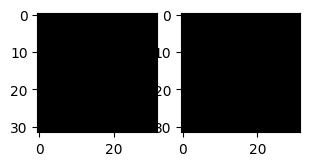

In [ ]:
# This is how our centroids look like
kmeans.cluster_centers_ = kmeans.cluster_centers_*255
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(2):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.imshow(kmeans.cluster_centers_[i].astype(int).reshape(32,32,3))

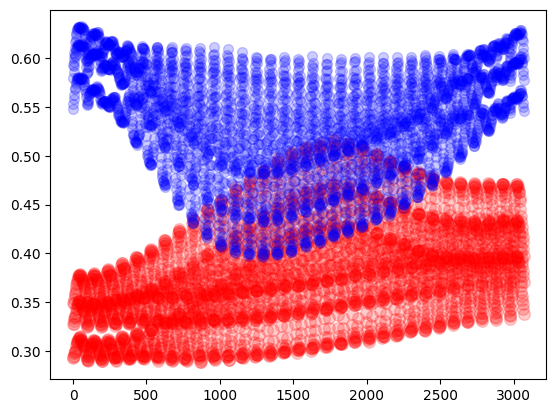

In [ ]:
# Scatter Plot for both the centroids
x_data = [i for i in range(3072)]
plt.scatter(x_data,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)

In [ ]:
# Since K-Means Does not know about our labels we have to change labels of k-means according to our usage

# mapping labels from cluster to original labels
def get_reference_dict(clusters,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label

# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

In [ ]:
reference_labels = get_reference_dict(clusters,data_label)
predicted_labels = get_labels(clusters,reference_labels)

In [ ]:
print(accuracy_score(predicted_labels,data_label))

0.51965


Text(0.5, 23.52222222222222, 'predicted label')

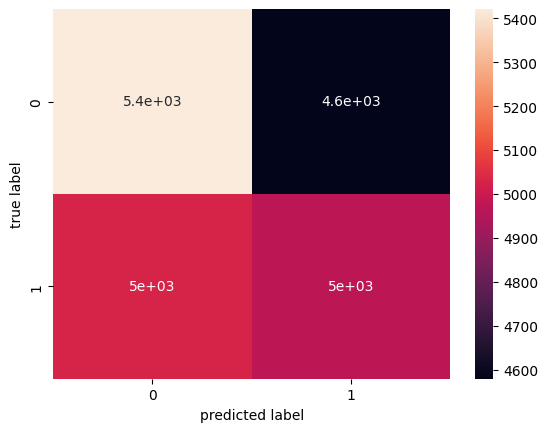

In [ ]:
mat = confusion_matrix(data_label,predicted_labels)
sns.heatmap(mat, annot=True)
plt.ylabel('true label')
plt.xlabel('predicted label')

In [ ]:
# elbow method
# squared distance
sse = []
list_k = [2,16,64,100,256]

for k in list_k:
    km = KMeans(n_clusters=k)
    clusters = km.fit_predict(reshaped_data)
    sse.append(km.inertia_)

    reference_labels = get_reference_dict(clusters,data_label)
    predicted_labels = get_labels(clusters,reference_labels)

    print(f"Accuracy for k = {k}: ", accuracy_score(predicted_labels,data_label))

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy for k = 2:  0.52032


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy for k = 16:  0.54884


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from IPython.display import Image as DisplayImage

for i in range(1, 11):
    image_path = f"/content/data/test1/{i}.jpg"

    test_image = Image.open(image_path).resize((64, 64))
    test_image_array = np.array(test_image) / 255.0
    test_image_flattened = test_image_array.reshape(-1, 3)

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    kmeans.fit(test_image_flattened)

    cluster_labels = kmeans.predict(data)

    print(np.mean(cluster_labels))

    if np.mean(cluster_labels) >= 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'

    print(f"Image {i}: This is a {prediction}")

    # Display the image
    DisplayImage(filename=image_path)


ValueError: ignored

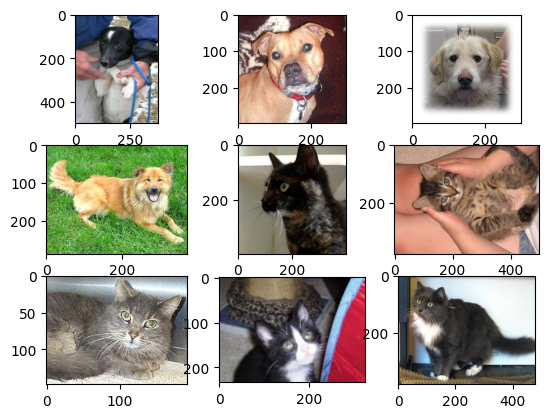

In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/data/test1/'
# plot first few images
for i in range(1,10):
 # define subplot
 pyplot.subplot(330 + i)
 # define filename
 filename = folder + str(i) + '.jpg'
 # load image pixels
 image = imread(filename)
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()